In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

COLUMN_NAMES = ["size", "num_float_64_sent", "time(s)"]
BENCHMARK_DIRECTORY = "../../../SuperComputerData/CondensedBasicBenchmarks"
PROCESSOR_VALUES = [2, 4, 6, 8, 10, 12, 16, 24, 36, 48]

In [11]:
# Load python benchmarks

send_benchmark_python = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n2-sendbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python_2 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n2-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python_4 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n4-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python_6 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n6-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python_8 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n8-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python_10 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n10-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python_12 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n12-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python_16 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n16-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python_24 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n24-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python_36 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n36-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python_48 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/python-n48-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_python = pd.concat(
    [
        broadcast_benchmark_python_2,
        broadcast_benchmark_python_4,
        broadcast_benchmark_python_6,
        broadcast_benchmark_python_8,
        broadcast_benchmark_python_10,
        broadcast_benchmark_python_12,
        broadcast_benchmark_python_24,
        broadcast_benchmark_python_36,
        broadcast_benchmark_python_48,
    ]
)

broadcast_benchmark_python.reset_index(drop=True, inplace=True)

broadcast_benchmark_python

,size,num_float_64_sent,time(s)
0,2,1024,0.000054
1,2,2048,0.000044
2,2,4096,0.000043
3,2,8192,0.000051
4,2,16384,0.000091
...,...,...,...
157,48,8388608,0.119027
158,48,16777216,0.235757
159,48,33554432,0.453476
160,48,67108864,0.915613


In [12]:
#  Load C benchmarks

send_benchmark_c = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n2-sendbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c_2 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n2-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c_4 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n4-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c_6 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n6-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c_8 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n8-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c_10 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n10-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c_12 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n12-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c_16 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n16-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c_24 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n24-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c_36 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n36-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c_48 = pd.read_csv(
    f"{BENCHMARK_DIRECTORY}/c-n48-broadcastbenchmark.csv", names=COLUMN_NAMES
)

broadcast_benchmark_c = pd.concat(
    [
        broadcast_benchmark_c_2,
        broadcast_benchmark_c_4,
        broadcast_benchmark_c_6,
        broadcast_benchmark_c_8,
        broadcast_benchmark_c_10,
        broadcast_benchmark_c_12,
        broadcast_benchmark_c_24,
        broadcast_benchmark_c_36,
        broadcast_benchmark_c_48,
    ]
)

broadcast_benchmark_c.reset_index(drop=True, inplace=True)

send_benchmark_c

,size,num_float_64_sent,time(s)
0,2,2048,0.000011
1,2,4096,0.000016
2,2,8192,0.000023
3,2,16384,0.000027
4,2,32768,0.000038
5,2,65536,0.000062
6,2,131072,0.000109
7,2,262144,0.000205
8,2,524288,0.000396
9,2,1048576,0.000776


Python Slope (s/Byte): 3.8705804026510674e-10
Bytes/s: 2583591854.3768587
Megabytes/s: 2463.9051955956065
Python Intercept (s): -0.004774049698194616
Python R-squared: 0.9999689912010474
Python P-value: 2.666641058859563e-44
Python Standard Error: 4.94479736457499e-13

C Slope (s/Bytes): 5.499726359023244e-10
Bytes/s: 1818272282.5097082
Megabytes/s: 1734.0395760628778
C Intercept (s): -0.07298127468626292
C R-squared: 0.9958351152043124
C P-value: 4.404531800534914e-24
C Standard Error: 8.159659936189665e-12


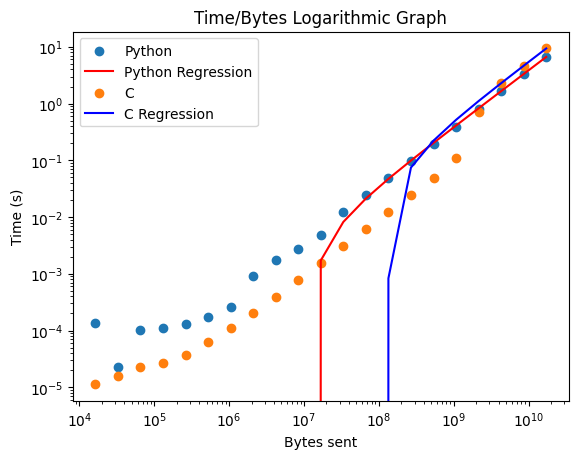

In [13]:
# the python time/MB sent

bytes_communicated_python = np.array(send_benchmark_python["num_float_64_sent"]) * 8
time_python = np.array(send_benchmark_python["time(s)"])


plt.scatter(bytes_communicated_python, time_python, label="Python")

slope_python, intercept_python, r_value_python, p_value_python, std_err_python = (
    stats.linregress(bytes_communicated_python, time_python)
)
plt.plot(
    bytes_communicated_python,
    intercept_python + slope_python * bytes_communicated_python,
    linestyle="-",
    color="red",
    label="Python Regression",
)

print(f"Python Slope (s/Byte): {slope_python}")
print(f"Bytes/s: {1/slope_python}")
print(f"Megabytes/s: {(1/slope_python) / 1024 / 1024}")
print(f"Python Intercept (s): {intercept_python}")
print(f"Python R-squared: {r_value_python**2}")
print(f"Python P-value: {p_value_python}")
print(f"Python Standard Error: {std_err_python}")
print()

# C stuff for sending

bytes_communicated_c = np.array(send_benchmark_c["num_float_64_sent"]) * 8
time_c = np.array(send_benchmark_c["time(s)"])

plt.scatter(bytes_communicated_c, time_c, label="C")

slope_c, intercept_c, r_value_c, p_value_c, std_err_c = stats.linregress(
    bytes_communicated_c, time_c
)
plt.plot(
    bytes_communicated_c,
    intercept_c + slope_c * bytes_communicated_c,
    linestyle="-",
    color="blue",
    label="C Regression",
)

print(f"C Slope (s/Bytes): {slope_c}")
print(f"Bytes/s: {1/slope_c}")
print(f"Megabytes/s: {(1/slope_c) / 1024 / 1024}")
print(f"C Intercept (s): {intercept_c}")
print(f"C R-squared: {r_value_c**2}")
print(f"C P-value: {p_value_c}")
print(f"C Standard Error: {std_err_c}")

plt.xlabel("Bytes sent")
plt.xscale("log")
plt.ylabel("Time (s)")
plt.yscale("log")
plt.title("Time/Bytes Logarithmic Graph")

plt.legend()

plt.show()


# 300 mb/s maybe

In [ ]:
# python broadcasts

plt.xlabel("MB sent")
plt.xscale("log")
plt.ylabel("Time (s)")
plt.yscale("log")
plt.title("Python Time/MB Logarithmic Graph for Broadcast")

for num_processors in PROCESSOR_VALUES:
    broadcast_data = broadcast_benchmark_python[
        broadcast_benchmark_python["size"] == num_processors
    ]
    plt.plot(
        np.array(broadcast_data["num_float_64_sent"] * 8 / 1024 / 1024),
        np.array(broadcast_data["time(s)"]),
        color=np.random.rand(
            3,
        ),
        label=f"Python Broadcast {num_processors}",
    )

plt.legend()

plt.show()

In [ ]:
# C broadcasts

plt.xlabel("MB sent")
plt.xscale("log")
plt.ylabel("Time (s)")
plt.yscale("log")
plt.title("C Time/MB Logarithmic Graph for Broadcast")

for num_processors in PROCESSOR_VALUES:
    broadcast_data = broadcast_benchmark_c[
        broadcast_benchmark_c["size"] == num_processors
    ]
    plt.plot(
        np.array(broadcast_data["num_float_64_sent"]) * 8 / 1024 / 1024,
        np.array(broadcast_data["time(s)"]),
        color=np.random.rand(
            3,
        ),
        label=f"C Broadcast {num_processors}",
    )

plt.legend()

plt.show()

In [ ]:
# C broadcast vs Python Broadcast

plt.xlabel("MB sent")
plt.xscale("log")
plt.ylabel("Time (s)")
plt.yscale("log")
plt.title("C Time/MB Logarithmic Graph for Broadcast")

for num_processors in PROCESSOR_VALUES:
    broadcast_data = broadcast_benchmark_python[
        broadcast_benchmark_python["size"] == num_processors
    ]
    plt.plot(
        np.array(broadcast_data["num_float_64_sent"]) * 8 / 1024 / 1024,
        np.array(broadcast_data["time(s)"]),
        color="purple",
        label=f"Python Broadcast {num_processors}",
    )

for num_processors in PROCESSOR_VALUES:
    broadcast_data = broadcast_benchmark_c[
        broadcast_benchmark_c["size"] == num_processors
    ]
    plt.plot(
        np.array(broadcast_data["num_float_64_sent"]) * 8 / 1024 / 1024,
        np.array(broadcast_data["time(s)"]),
        color="green",
        label=f"C Broadcast {num_processors}",
    )

# plt.legend(fontsize="small")

plt.show()

# Purple is python, Green is C

In [ ]:
last_row = broadcast_benchmark_c[broadcast_benchmark_c["size"] == 2].iloc[-1]
last_row
# mb/s
(last_row["num_float_64_sent"] * 8 / 1024 / 1024) / last_row["time(s)"]